# **Tên dự án** : Dữ đoán thông số sản xuất và thiết kế ngành In vải bằng máy học 
---
**1. Mô tả dự án:**
* Loại dự án - Phân loại
* Mô tả dự án:
    * Ngành công nghiệp in vải đang phát triển mạnh mẽ, với nhu cầu ngày càng cao về chất lượng in ấn, độ chính xác của màu sắc và hiệu suất sản xuất. Một trong những thách thức lớn nhất của ngành là việc xác định chính xác các thông số sản xuất (nhiệt độ, tốc độ ép, loại máy in, ...) và thông số thiết kế (mã màu, ICC profile, ...) để đảm bảo chất lượng đầu ra tối ưu.
    * Hiện nay, việc xác định các thông số này chủ yếu dựa vào kinh nghiệm của nhân viên kỹ thuật. Quy trình thủ công này có nhiều hạn chế:
        - Tốn thời gian: Các thông số cần được điều chỉnh thủ công, dẫn đến việc phải thử nghiệm nhiều lần.
        - Không nhất quán: Kinh nghiệm của mỗi nhân viên khác nhau, dẫn đến chất lượng in ấn không đồng đều.
        - Tỷ lệ lỗi cao: Sai lệch về màu sắc so với bản thiết kế gốc có thể xảy ra, gây lãng phí nguyên vật liệu.
    * Với sự phát triển của Trí tuệ nhân tạo (AI) và Học máy (Machine Learning), việc ứng dụng các thuật toán học máy vào dự đoán thông số sản xuất có thể giúp tự động hóa quy trình, tăng độ chính xác và giảm chi phí sản xuất.
    * Dự án FabricML: Dự đoán Thông Số Sản Xuất và Thiết Kế Ngành In Vải Bằng Máy Học được thực hiện nhằm giải quyết bài toán này, giúp tối ưu hóa quy trình sản xuất thông qua công nghệ học máy.
    
**2. Chi tiết chính**
* Tập dữ liệu bao gồm các thông tin sau:
    - LOẠI VẢI: Chất liệu vải (lụa Latin, thun lạnh, chiffon, gấm, v.v.)
    - CMYK ĐO: Giá trị màu đo được từ thiết bị (định dạng C-M-Y-K, ví dụ: 50-12-5-30)
    - CMYK FILE: Giá trị màu mục tiêu cần đạt được (định dạng tương tự)
    - MÁY IN: Loại máy in được sử dụng (ATEXCO-1, ATEXCO-2, MÁY 18, v.v.)
    - ICC: Hồ sơ màu (VEGAPRINT DEFAULT, PRINTFACTORY 2024, RIIN DEFAULT, v.v.)
    - MÁY ÉP: Thông số máy ép (ví dụ: 4.0, 5.0, 6.0)
    - TỐC ĐỘ: Tốc độ in (m/min)
    - HIỆT ĐỘ: Nhiệt độ ép (℃)
* Dữ liệu đầu vào:
    - Thông số CMYK đo được (CMYK ĐO): Gồm 4 giá trị C (Cyan), M (Magenta), Y (Yellow), K (Key/Black) được đo từ mẫu vải
    - Loại vải: Các loại vải khác nhau như LỤA LATIN, THUN LẠNH, CHIFON,...
    - Thông số máy móc: MÁY IN, ICC (hồ sơ màu), MÁY ÉP
* Mục tiêu dự đoán:
    - Thông số CMYK FILE (Thông số sản xuất lịch sử từ các lần in trước.): 4 giá trị C, M, Y, K của file thiết kế
    - Các thông số vận hành: TỐC ĐỘ, NHIỆT ĐỘ

## 1. Chuẩn bị dữ liệu

### Nhập thư viện cần thiết 
---
Ở đây đang nhập tất cả các thư viện cần thiết.

In [2]:
# Nhập thư viện
# Nhập Numpy & Pandas để xử lý dữ liệu & sắp xếp dữ liệu
import numpy as np
import pandas as pd

# Nhập công cụ để trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Nhập thư viện số liệu đánh giá
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Thư viện được sử dụng để xử lý trước dữ liệu
from sklearn.preprocessing import LabelEncoder

# Nhập thư viện lựa chọn mô hình
from sklearn.model_selection import train_test_split, GridSearchCV

# Thư viện được sử dụng để triển khai Mô hình ML
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.multioutput import MultiOutputRegressor

# Thư viện được sử dụng để bỏ qua cảnh báo
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Đọc và quan sát bộ dữ liệu

* Bây giờ hãy tải tập dữ liệu vào khung dữ liệu của gấu trúc. Để xử lý dữ liệu tốt hơn và tận dụng các chức năng tiện dụng để thực hiện các tác vụ phức tạp trong một lần.

In [4]:
# Tải tập dữ liệu
df = pd.read_excel("FAKE_DATA_1000.xlsx")

**Bộ dữ liệu đầu tiên**

In [17]:
# Xem 5 hàng đầu tiên của tập dữ liệu
df.head()

,LOẠI VẢI,CMYK ĐO,CMYK FILE,MÁY IN,ICC,MÁY ÉP,TỐC ĐỘ,NHIỆT ĐỘ
0,LỤA LATIN,50-12-5-30,48-10-7-32,ATEXCO-1,PRINTFACTORY 2024,4,17,225
1,THUN LẠNH,0-12-30-5,2-10-32-7,ATEXCO-2,VEGAPRINT DEFAULT,5,28,225
2,CHIFON,3-48-25-12,3-49-25-13,ATEXCO-3,PRINTFACTORY DEFAULT,1,32,225
3,MÈ KIM,0-35-36-3,0-35-35-3,MÁY 21,RIIN DEFAULT,5,30,225
4,TƠ ÁNH,23-10-10-5,20-11-10-5,MÁY 18,MAINTOP DEFAUT,1,32,225


**Số lượng hàng và cột của tập dữ liệu**

In [7]:
# Đếm số hàng và cột của tập dữ liệu
# Kiểm tra số hàng và cột của tập dữ liệu bằng hình dạng
print("Số hàng: ", df.shape[0])
print("Số cột: ", df.shape[1])

Số hàng:  1010
Số cột:  8


**Thông tin tập dữ liệu**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LOẠI VẢI   1010 non-null   object
 1   CMYK ĐO    1010 non-null   object
 2   CMYK FILE  1010 non-null   object
 3   MÁY IN     1010 non-null   object
 4   ICC        1010 non-null   object
 5   MÁY ÉP     1010 non-null   int64 
 6   TỐC ĐỘ     1010 non-null   int64 
 7   NHIỆT ĐỘ   1010 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 63.3+ KB


### Phát hiện và sử lý dữ liệu

**Kiểm tra Giá trị trùng lặp**

In [15]:
dup = df.duplicated().sum()
print(f'Số hàng trùng lặp: {dup}')

Số hàng trùng lặp: 0


**Giá trị bị thiếu/Giá trị Null**

In [13]:
df.isnull().sum()

LOẠI VẢI     0
CMYK ĐO      0
CMYK FILE    0
MÁY IN       0
ICC          0
MÁY ÉP       0
TỐC ĐỘ       0
NHIỆT ĐỘ     0
dtype: int64

ádasd

## 2. Hiểu các biến
---

In [19]:
# Cột dữ liệu
df.columns

Index(['LOẠI VẢI', 'CMYK ĐO', 'CMYK FILE', 'MÁY IN', 'ICC', 'MÁY ÉP', 'TỐC ĐỘ',
       'NHIỆT ĐỘ'],
      dtype='object')

In [11]:
# Mô tả bộ dữ liệu (bao gồm tất cả các cột)
df.describe(include='all').round(2)

,LOẠI VẢI,CMYK ĐO,CMYK FILE,MÁY IN,ICC,MÁY ÉP,TỐC ĐỘ,NHIỆT ĐỘ
count,1010,1010,1010,1010,1010,1010.00,1010.00,1010.0
unique,10,1010,1010,7,7,NaN,NaN,NaN
top,LỤA LATIN,50-12-5-30,48-10-7-32,ATEXCO-1,PRINTFACTORY DEFAULT,NaN,NaN,NaN
freq,119,1,1,513,511,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.86,11.94,225.0
std,NaN,NaN,NaN,NaN,NaN,0.62,4.07,0.0
min,NaN,NaN,NaN,NaN,NaN,1.00,10.00,225.0
25%,NaN,NaN,NaN,NaN,NaN,6.00,10.00,225.0
50%,NaN,NaN,NaN,NaN,NaN,6.00,11.00,225.0
75%,NaN,NaN,NaN,NaN,NaN,6.00,12.00,225.0


**Kiểm tra Giá trị duy nhất cho mỗi biến.**

In [13]:
for i in df.columns.tolist():
    print("Số giá trị duy nhất trong", i, "là", df[i].nunique())

Số giá trị duy nhất trong LOẠI VẢI là 10
Số giá trị duy nhất trong CMYK ĐO là 1010
Số giá trị duy nhất trong CMYK FILE là 1010
Số giá trị duy nhất trong MÁY IN là 7
Số giá trị duy nhất trong ICC là 7
Số giá trị duy nhất trong MÁY ÉP là 6
Số giá trị duy nhất trong TỐC ĐỘ là 26
Số giá trị duy nhất trong NHIỆT ĐỘ là 1


### 3. Chuẩn hoá dữ liệu
---
Tách cột CMYK thành 4 cột riêng biệt

Cột CMYK ĐO và CMYK FILE chứa dữ liệu dạng chuỗi số, ví dụ "50-12-5-30". Chúng được tách thành 4 cột riêng biệt (C, M, Y, K) và chuyển đổi sang kiểu số (float).

In [6]:
df_cmyk_do = df["CMYK ĐO"].str.split('-', expand=True).astype(int)
df_cmyk_do.columns = ["CMYK ĐO_C", "CMYK ĐO_M", "CMYK ĐO_Y", "CMYK ĐO_K"]

df_cmyk_file = df["CMYK FILE"].str.split('-', expand=True).astype(int)
df_cmyk_file.columns = ["CMYK FILE_C", "CMYK FILE_M", "CMYK FILE_Y", "CMYK FILE_K"]


In [8]:
# Gộp tất cả vào DataFrame chính (loại bỏ cột gốc)
df = df.drop(columns=["CMYK ĐO", "CMYK FILE"])
df = pd.concat([df, df_cmyk_do, df_cmyk_file], axis=1)

# Xuất DataFrame đã xử lý
df.head()


,LOẠI VẢI,MÁY IN,ICC,MÁY ÉP,TỐC ĐỘ,NHIỆT ĐỘ,CMYK ĐO_C,CMYK ĐO_M,CMYK ĐO_Y,CMYK ĐO_K,CMYK FILE_C,CMYK FILE_M,CMYK FILE_Y,CMYK FILE_K
0,LỤA LATIN,ATEXCO-1,PRINTFACTORY 2024,4,17,225,50,12,5,30,48,10,7,32
1,THUN LẠNH,ATEXCO-2,VEGAPRINT DEFAULT,5,28,225,0,12,30,5,2,10,32,7
2,CHIFON,ATEXCO-3,PRINTFACTORY DEFAULT,1,32,225,3,48,25,12,3,49,25,13
3,MÈ KIM,MÁY 21,RIIN DEFAULT,5,30,225,0,35,36,3,0,35,35,3
4,TƠ ÁNH,MÁY 18,MAINTOP DEFAUT,1,32,225,23,10,10,5,20,11,10,5


## 4. Trực quan hóa dữ liệu
---
Dưới đây là các biểu đồ trực quan hóa quan trọng giúp phân tích dữ liệu in vải:


### 4.1 Phân bố các loại vải

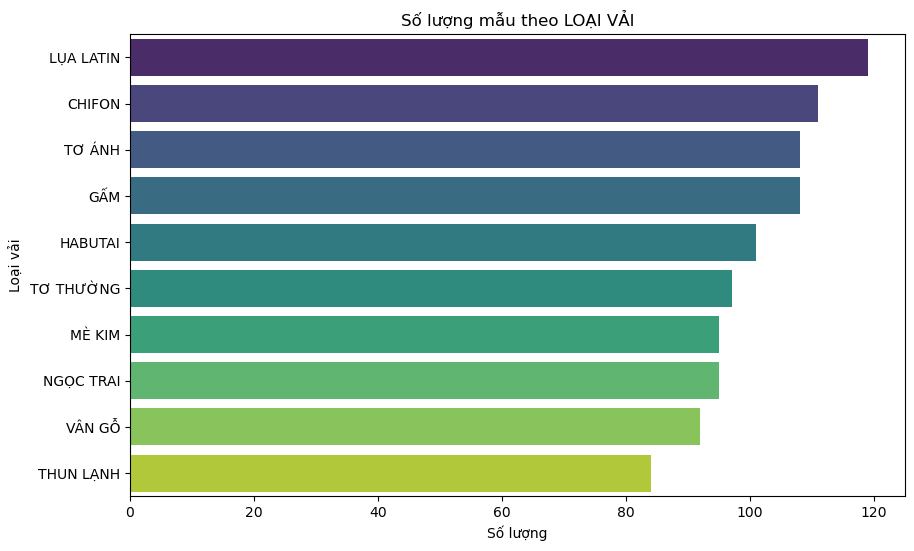

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="LOẠI VẢI", order=df["LOẠI VẢI"].value_counts().index, palette="viridis")
plt.title('Số lượng mẫu theo LOẠI VẢI')
plt.xlabel('Số lượng')
plt.ylabel('Loại vải')
plt.show()

Nhận xét: Dữ liệu có sự cân bằng tương đối giữa các loại vải, với Lụa Latin và Thun lạnh chiếm tỷ lệ cao nhất.

### 4.2. Trực quan hóa mối quan hệ giữa các kênh CMYK (ĐO và FILE)

Xem xét tương quan giữa các biến:

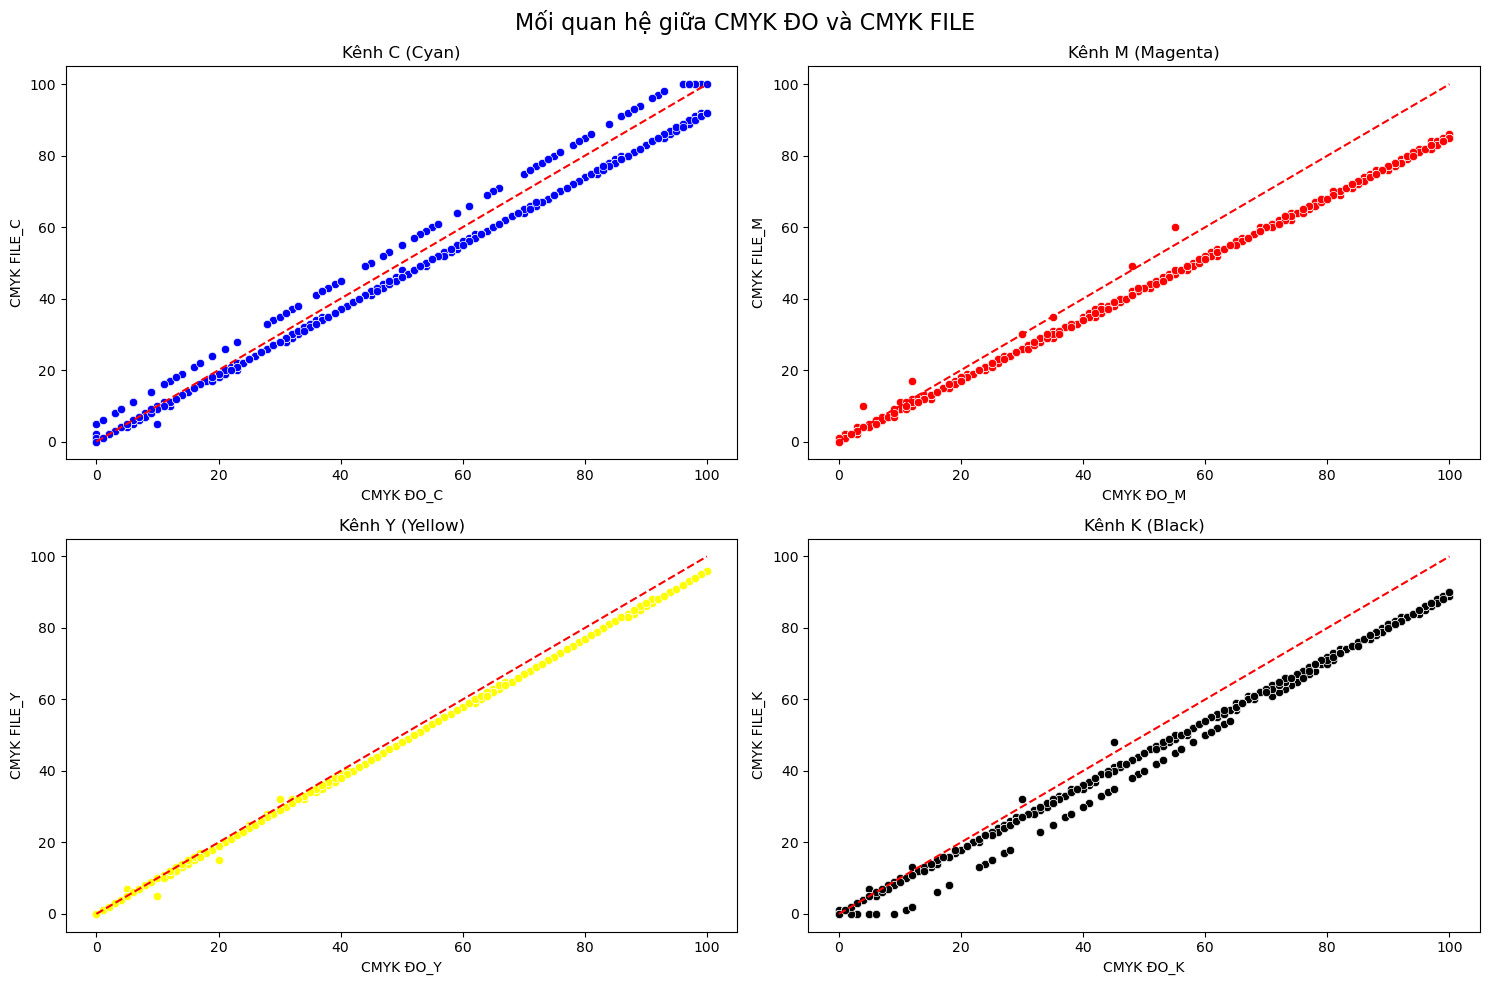

In [21]:
# Tạo subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Mối quan hệ giữa CMYK ĐO và CMYK FILE', fontsize=16)

# Vẽ scatter plot cho từng kênh
sns.scatterplot(data=df, x="CMYK ĐO_C", y="CMYK FILE_C", ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Kênh C (Cyan)')
axes[0, 0].plot([0, 100], [0, 100], 'r--')  # Đường chéo lý tưởng

sns.scatterplot(data=df, x="CMYK ĐO_M", y="CMYK FILE_M", ax=axes[0, 1], color='red')
axes[0, 1].set_title('Kênh M (Magenta)')
axes[0, 1].plot([0, 100], [0, 100], 'r--')

sns.scatterplot(data=df, x="CMYK ĐO_Y", y="CMYK FILE_Y", ax=axes[1, 0], color='yellow')
axes[1, 0].set_title('Kênh Y (Yellow)')
axes[1, 0].plot([0, 100], [0, 100], 'r--')

sns.scatterplot(data=df, x="CMYK ĐO_K", y="CMYK FILE_K", ax=axes[1, 1], color='black')
axes[1, 1].set_title('Kênh K (Black)')
axes[1, 1].plot([0, 100], [0, 100], 'r--')

plt.tight_layout()
plt.show()

### 4.3  Trực quan hóa số lượng từng ICC Profile


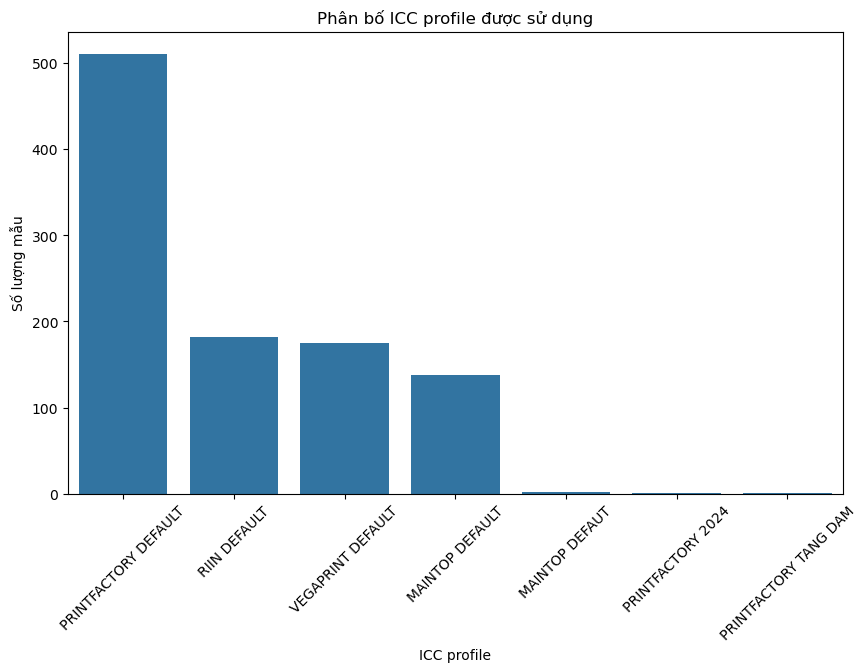

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ICC', order=df['ICC'].value_counts().index)
plt.title('Phân bố ICC profile được sử dụng')
plt.xlabel('ICC profile')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45)
plt.show()

## 5. Xử lý dữ liệu
---

### 5.1 Mã hóa biến phân loại

* Các cột chứa dữ liệu dạng chữ (LOẠI VẢI, MÁY IN, ICC, MÁY ÉP) được chuyển thành số bằng LabelEncoder.

In [8]:
categorical_cols = ["LOẠI VẢI", "MÁY IN", "ICC", "MÁY ÉP"]
df_cat_transformed = df[categorical_cols].copy()
label_encoders = {} #  Khởi tạo dictionary giúp lưu lại bộ mã hóa

for col in categorical_cols:
    le = LabelEncoder()
    df_cat_transformed[col] = le.fit_transform(df_cat_transformed[col])# mã hoá dữ liệu
    label_encoders[col] = le  # Lưu lại encoder nếu cần dùng sau


* Chuyển đổi biến phân loại (LOẠI VẢI, MÁY IN, ICC, MÁY ÉP) sang dạng số bằng LabelEncoder().
* Điều này cần thiết vì mô hình XGBoost không xử lý dữ liệu dạng chuỗi.

### 5.2 Chuẩn hóa dữ liệu số
---
* Chuẩn hóa dữ liệu số bằng StandardScaler
* Các cột TỐC ĐỘ và NHIỆT ĐỘ được chuẩn hóa để dữ liệu có phân phối chuẩn.

In [10]:
numeric_cols = ["TỐC ĐỘ", "NHIỆT ĐỘ"]
df_num_transformed = df[numeric_cols].copy()
scaler_num = StandardScaler()
df_num_transformed[numeric_cols] = scaler_num.fit_transform(df_num_transformed[numeric_cols])

* Chuẩn hóa TỐC ĐỘ và NHIỆT ĐỘ để mô hình không bị ảnh hưởng bởi đơn vị đo lường.

### 5.3 Gộp tất cả lại thành DataFrame hoàn chỉnh

Các cột sau khi tiền xử lý được kết hợp lại (pd.concat), tạo ra tập dữ liệu sạch và sẵn sàng để đưa vào mô hình.

In [12]:
df_processed = pd.concat([ df_cmyk_do,df_cat_transformed, df_cmyk_file, df_num_transformed], axis=1)
df_processed


,CMYK ĐO_C,CMYK ĐO_M,CMYK ĐO_Y,CMYK ĐO_K,LOẠI VẢI,MÁY IN,ICC,MÁY ÉP,CMYK FILE_C,CMYK FILE_M,CMYK FILE_Y,CMYK FILE_K,TỐC ĐỘ,NHIỆT ĐỘ
0,50,12,5,30,3,0,2,3,48,10,7,32,1.243870,0.0
1,0,12,30,5,6,1,6,4,2,10,32,7,3.946137,0.0
2,3,48,25,12,0,2,3,0,3,49,25,13,4.928779,0.0
3,0,35,36,3,4,6,5,4,0,35,35,3,4.437458,0.0
4,23,10,10,5,8,3,1,0,20,11,10,5,4.928779,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0,69,43,35,1,4,5,5,0,59,41,31,-0.475755,0.0
1006,34,97,46,7,1,1,6,5,31,83,44,7,0.506888,0.0
1007,69,64,52,72,2,0,3,5,64,55,50,65,0.015567,0.0
1008,100,73,73,57,6,0,3,5,92,63,70,51,-0.475755,0.0


* Gộp tất cả các dữ liệu đã xử lý để chuẩn bị cho việc huấn luyện mô hình.

## 6. Xây dựng mô hình
---


### 1. Bài toán phân loại (Classification)     


Phân loại được sử dụng khi giá trị đầu ra thuộc về một tập hợp các nhóm hoặc danh mục rời rạc. Trong trường hợp này:

**Dự đoán Loại máy in tối ưu**
* Dữ liệu đầu ra: Một danh sách các loại máy in có sẵn.
* Tại sao là phân loại?
    - Vì số lượng máy in có giới hạn và mỗi máy in có mã riêng biệt.
    - Mô hình chỉ cần chọn một trong các loại máy in có sẵn.

**Dự đoán ICC profile phù hợp**
* Dữ liệu đầu ra: Hồ sơ ICC có sẵn.
* Tại sao là phân loại?
    - ICC profile không phải một giá trị số liên tục mà là một tập hợp danh mục có sẵn.
    - Mô hình cần chọn ICC profile phù hợp nhất từ danh sách đã biết.

**Dự đoán Máy ép phù hợp**
* Dữ liệu đầu ra: Một danh sách máy ép có sẵn.
* Tại sao là phân loại?
    - Giống như máy in, số lượng máy ép có giới hạn và có thể được mã hóa thành các nhãn cụ thể.

### 2. Bài toán hồi quy (Regression)



Hồi quy được sử dụng khi đầu ra là một giá trị số liên tục. Trong trường hợp của bạn:

**Dự đoán mã màu CMYK phù hợp để in**
* Dữ liệu đầu ra: CMYK FILE (C, M, Y, K) là thông số màu lịch sử từ các lần in trước.
* Tại sao là phân loại?
    - CMYK FILE không phải một giá trị số bất kỳ mà thường nằm trong một số mẫu màu phổ biến có sẵn.
    - Ví dụ: Một số nhóm màu có thể được mã hóa thành các nhãn cụ thể, chẳng hạn như "Màu Xanh Đậm", "Màu Đỏ Nhạt",...
    - Nếu có số lượng mẫu màu hữu hạn (ví dụ: 100 màu có thể in), đây là bài toán phân loại đa lớp.

**Dự đoán Tốc độ ép**
* Dữ liệu đầu ra: Một giá trị số liên tục thể hiện tốc độ ép (m/s, cm/s, hoặc một đơn vị đo tốc độ khác).
* Tại sao là hồi quy?
    - Vì tốc độ ép có thể có bất kỳ giá trị nào trong khoảng nhất định (ví dụ: 1.2 m/s, 3.5 m/s,...).
    - Nó không thuộc về một nhóm danh mục cố định.

**Dự đoán Nhiệt độ ép**
* Dữ liệu đầu ra: Một giá trị số liên tục thể hiện nhiệt độ ép (°C).
* Tại sao là hồi quy?
    - Giống như tốc độ ép, nhiệt độ có thể nhận giá trị bất kỳ trong khoảng nhất định (ví dụ: 120.5°C, 150°C, 200.3°C,...).
    - Không phải là một danh mục rời rạc.

**Dựa vào loại bài toán, bạn có thể sử dụng các mô hình phù hợp:**

* Phân loại:
    - Random Forest Classifier
    - Gradient Boosting Classifier (XGBoost, LightGBM)
    - Neural Network (cho bài toán phức tạp)
* Hồi quy:
    - Linear Regression (Hồi quy tuyến tính)
    - Random Forest Regressor
    - Gradient Boosting Regressor

### 6.1 Chia dữ liệu thành đầu vào (X) và đầu ra (y) cho bài toán phân loại và học máy
* X: Các đặc trưng đầu vào như LOẠI VẢI, CMYK ĐO_C, CMYK ĐO_M, CMYK ĐO_Y, CMYK ĐO_K.
* y: Các giá trị cần dự đoán như CMYK FILE_C, CMYK FILE_M, CMYK FILE_Y, CMYK FILE_K, MÁY IN, ICC, MÁY ÉP.

In [16]:
input_columns = ["LOẠI VẢI", "CMYK ĐO_C", "CMYK ĐO_M", "CMYK ĐO_Y", "CMYK ĐO_K"]
target_columns_classification = ["MÁY IN", "ICC", "MÁY ÉP"]
target_columns_regression = ["CMYK FILE_C", "CMYK FILE_M", "CMYK FILE_Y", "CMYK FILE_K", "TỐC ĐỘ", "NHIỆT ĐỘ"]


In [18]:
# Dữ liệu hồi quy 
X_regression = df_processed[input_columns]
y_regression = df_processed[target_columns_regression]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [20]:
# Dữ liệu phân loại
X_classification = df_processed[input_columns]
y_classification = df_processed[target_columns_classification]
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split( X_classification, y_classification, test_size=0.3, random_state=42)


* Chia dữ liệu thành tập huấn luyện (70%) và tập kiểm tra (30%).

### 6.2 Huốn luyện mô hình phân loại với máy in, ICC, máy ép

#### 6.2.1 Huấn luyện mô hình RandomForestClassifier


In [22]:
# Cho bài toán phân loại
model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train_cls, y_train_cls)


RandomForestClassifier(random_state=42)

#### 6.2.2 Đánh giá mô hình

In [24]:
y_pred_cls = model_RFC.predict(X_test_cls)
accuracies = {col: accuracy_score(y_test_cls[col], y_pred_cls[:, y_test_cls.columns.get_loc(col)]) for col in y_test_cls.columns}
# In kết quả phân loại
print("Độ chính xác phân loại:")
for col, acc in accuracies.items():
    print(f"{col}: {acc:.2f}")


Độ chính xác phân loại:
MÁY IN: 0.74
ICC: 0.85
MÁY ÉP: 0.95


### 6.3 Huấn luyện mô hình hồi quy với CMYK, tốc độ, nhiệt độ 

#### 6.3.1 RandomForestRegressor

In [28]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)
model_RFR.fit(X_train_reg, y_train_reg)


RandomForestRegressor(random_state=42)

#### 6.3.2 LinearRegression

In [30]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train_reg, y_train_reg)

LinearRegression()

#### 6.3.3 XGBoost

In [32]:
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### 6.3.4 Đánh giá mô hình hồi quy

In [34]:
models = {
    "XGBoost": model_xgb,
    "Random Forest": model_RFR,
    "Linear Regression": model_LinearRegression
}

for name, model in models.items():
    y_pred = model.predict(X_test_reg)
    
    mae = mean_absolute_error(y_test_reg, y_pred)
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred)  # Tính R-squared

    print(f"{name}:")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R²: {r2}")
    print("-" * 40)

XGBoost:
  MAE: 0.39159390330314636
  MSE: 0.6451050639152527
  RMSE: 0.8031843274835813
  R²: 0.7861953377723694
----------------------------------------
Random Forest:
  MAE: 2.982675053854713
  MSE: 22.211515447303757
  RMSE: 4.7129094461175205
  R²: 0.8290446425900679
----------------------------------------
Linear Regression:
  MAE: 0.6125807097901556
  MSE: 1.8895896361506486
  RMSE: 1.3746234524955
  R²: 0.846928032487528
----------------------------------------


* Kết quả của từng mô hình được đánh giá bằng:
    - MAE (Mean Absolute Error): Càng nhỏ càng tốt.
    - MSE (Mean Squared Error) & RMSE: Đo lường sai số, RMSE dễ hiểu hơn vì cùng đơn vị với dữ liệu thực tế.
    - R² (R-squared): Đánh giá mức độ mô hình giải thích được dữ liệu.

## 7. Thử trên dữ liệu mẫu

In [60]:
# Dữ liệu test mẫu
test_sample = {
    "LOẠI VẢI": "CHIFON",
    "CMYK ĐO_C": 50,
    "CMYK ĐO_M": 40,
    "CMYK ĐO_Y": 30,
    "CMYK ĐO_K": 10
}

# Chuyển thành DataFrame
df_test = pd.DataFrame([test_sample])
# type(df_test)


In [ ]:
# Mã hóa cột 'LOẠI VẢI' bằng LabelEncoder đã lưu
df_test["LOẠI VẢI"] = label_encoders["LOẠI VẢI"].transform(df_test["LOẠI VẢI"])
X_test_sample = df_test.values

In [62]:
#dự đoán phân loại (MÁY IN, ICC, MÁY ÉP)
y_pred_cls = model_RFC.predict(X_test_sample)
print("Dự đoán phân loại:", y_pred_cls)
#dự đoán hồi quy (CMYK FILE, TỐC ĐỘ, NHIỆT ĐỘ):
y_pred_reg = model_LinearRegression.predict(X_test_sample)
print("Dự đoán hồi quy:", y_pred_reg)

Dự đoán phân loại: [[5 0 5]]
Dự đoán hồi quy: [[46.55188305 34.39180705 28.84890531  9.59464928  0.12831285  0.        ]]


In [66]:
# Chuyển kết quả phân loại thành DataFrame
y_pred_cls_df = pd.DataFrame(y_pred_cls, columns=["MÁY IN", "ICC", "MÁY ÉP"])

# Chuyển kết quả hồi quy thành DataFrame
y_pred_reg_df = pd.DataFrame(y_pred_reg, columns=["CMYK FILE_C", "CMYK FILE_M", "CMYK FILE_Y", "CMYK FILE_K", "TỐC ĐỘ", "NHIỆT ĐỘ"])

# Giải mã các cột phân loại nếu cần
for col in ["MÁY IN", "ICC", "MÁY ÉP"]:
    y_pred_cls_df[col] = label_encoders[col].inverse_transform(y_pred_cls_df[col].astype(int))

# Chỉ chuẩn hóa ngược cột "TỐC ĐỘ" và "NHIỆT ĐỘ"
y_pred_reg_df[["TỐC ĐỘ", "NHIỆT ĐỘ"]] = scaler_num.inverse_transform(
    y_pred_reg_df[["TỐC ĐỘ", "NHIỆT ĐỘ"]]
)

# Gộp hai DataFrame
final_result = pd.concat([y_pred_cls_df, y_pred_reg_df], axis=1)

# Hiển thị kết quả
print("🔍 Kết quả dự đoán sau khi giải mã:")
print(final_result)

🔍 Kết quả dự đoán sau khi giải mã:
   MÁY IN              ICC  MÁY ÉP  CMYK FILE_C  CMYK FILE_M  CMYK FILE_Y  \
0  MÁY 20  MAINTOP DEFAULT       6    46.551883    34.391807    28.848905   

   CMYK FILE_K     TỐC ĐỘ  NHIỆT ĐỘ  
0     9.594649  12.458951     225.0  


In [ ]:
#Độ chính xác trên tập test (Test data) với một cột
y_pred_cls = model_RFC.predict(X_test_cls) 
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"máy in: {accuracy:.2f}")

In [82]:
# Độ chính xác trên tập huấn luyện (Training data) với một cột
y_train_pred = model_RFC.predict(X_train_cls)

# Tính độ chính xác trên tập huấn luyện
train_accuracy = accuracy_score(y_train_cls, y_train_pred)
print(f"Độ chính xác trên tập huấn luyện: {train_accuracy:.4f}")


In [86]:
# Độ chính xác trên tập huấn luyện (Training data)
# Tính accuracy cho từng nhãn riêng lẻ
y_train_pred = model_RFC.predict(X_train_cls)
accuracies = []
for i, col in enumerate(target_columns_classification):
    acc = accuracy_score(y_train_cls.iloc[:, i], y_train_pred[:, i])
    accuracies.append(acc)
    print(f"Độ chính xác của '{col}': {acc:.4f}")

# Độ chính xác trung bình
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"Độ chính xác trung bình trên tập huấn luyện: {mean_accuracy:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [707, 303]

In [70]:
# huấn luyện mô hình RandomForestRegressor tìm ra từng cột CMYK  với 100 lớp
input_columns = ["LOẠI VẢI", "CMYK ĐO_C", "CMYK ĐO_M", "CMYK ĐO_Y", "CMYK ĐO_K"]
target_columns = ["CMYK FILE_C", "CMYK FILE_M", "CMYK FILE_Y", "CMYK FILE_K"]

# Dữ liệu hồi quy 
X_regression = df_processed[input_columns]
y_regression = df_processed[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

models = {}
for col in target_columns:
    model = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=42)
    model.fit(X_train, y_train[col])  # Huấn luyện từng mô hình riêng
    models[col] = model

print("Huấn luyện xong!")

# Tạo danh sách để lưu kết quả
results = {}

for col in target_columns:
    y_pred = models[col].predict(X_test)
    # train = models[col].score(X_train, y_train) * 100
    # Tính toán sai số
    mae = mean_absolute_error(y_test[col], y_pred)
    mse = mean_squared_error(y_test[col], y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[col], y_pred)

    # Lưu kết quả
    results[col] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

# In kết quả đánh giá
import pandas as pd
results_df = pd.DataFrame(results).T  # Chuyển thành DataFrame để dễ xem
print("Kết quả đánh giá mô hình:")
print(results_df)

Huấn luyện xong!
Kết quả đánh giá mô hình:
                  MAE       MSE      RMSE        R²
CMYK FILE_C  1.781192  8.338548  2.887654  0.989889
CMYK FILE_M  0.547293  1.270838  1.127314  0.997940
CMYK FILE_Y  0.334066  0.293730  0.541969  0.999597
CMYK FILE_K  0.839369  1.753221  1.324093  0.997326


In [72]:
for col in y_train.columns:
    train_r2 = models[col].score(X_train, y_train[col])
    test_r2 = models[col].score(X_test, y_test[col])
    print(f"{col}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

CMYK FILE_C: Train R² = 0.9930, Test R² = 0.9899
CMYK FILE_M: Train R² = 0.9996, Test R² = 0.9979
CMYK FILE_Y: Train R² = 0.9998, Test R² = 0.9996
CMYK FILE_K: Train R² = 0.9986, Test R² = 0.9973


In [76]:
# huấn luyện mô hình RandomForestClassifier tìm ra từng cột CMYK  với 100 lớp
# Danh sách cột đầu vào và đầu ra

from sklearn.preprocessing import KBinsDiscretizer
input_columns = ["LOẠI VẢI", "CMYK ĐO_C", "CMYK ĐO_M", "CMYK ĐO_Y", "CMYK ĐO_K"]
target_columns = ["CMYK FILE_C", "CMYK FILE_M", "CMYK FILE_Y", "CMYK FILE_K"]

# Dữ liệu phân loại
X_classification = df_processed[input_columns].copy()
y_classification = df_processed[target_columns].copy()  # Sao chép để tránh ảnh hưởng gốc

# Chuyển đổi giá trị liên tục thành nhãn phân loại bằng KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')  # Chia thành 5 nhóm
y_classification = pd.DataFrame(discretizer.fit_transform(y_classification), columns=target_columns)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.3, random_state=42
)

# Huấn luyện từng mô hình phân loại cho từng cột đầu ra
models = {}
for col in target_columns:
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train_cls, y_train_cls[col])  # Huấn luyện từng mô hình riêng
    models[col] = model

print("Huấn luyện xong!")

# Đánh giá mô hình
results = {}
for col in target_columns:
    y_pred = models[col].predict(X_test_cls)

    # Đánh giá bằng accuracy và classification report
    accuracy = accuracy_score(y_test_cls[col], y_pred)
    report = classification_report(y_test_cls[col], y_pred, output_dict=True)  # Báo cáo chi tiết

    # Lưu kết quả
    results[col] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

# Chuyển kết quả thành DataFrame để dễ xem
results_df = pd.DataFrame(results).T
print("Kết quả đánh giá mô hình:")
print(results_df)

Huấn luyện xong!
Kết quả đánh giá mô hình:
             Accuracy  Precision    Recall  F1-score
CMYK FILE_C  0.881188   0.900050  0.881188  0.859943
CMYK FILE_M  0.924092   0.924186  0.924092  0.923044
CMYK FILE_Y  0.894389   0.935336  0.894389  0.888484
CMYK FILE_K  0.940594   0.944096  0.940594  0.940689


In [78]:
# Đánh giá trên tập huấn luyện
results_train = {}
for col in target_columns:
    y_train_pred = models[col].predict(X_train_cls)
    accuracy_train = accuracy_score(y_train_cls[col], y_train_pred)
    results_train[col] = accuracy_train

print("Accuracy trên tập huấn luyện:", results_train)

Accuracy trên tập huấn luyện: {'CMYK FILE_C': 0.9123055162659123, 'CMYK FILE_M': 0.9801980198019802, 'CMYK FILE_Y': 0.9603960396039604, 'CMYK FILE_K': 0.9816124469589816}
